[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nlcuccia/AM216/blob/master/HW1/P3.ipynb)

# AM216 Homework 1: Problem 3 
Adriana Trejo-Sheu

collaborators: Ali Simmons, Hazel Wong, Diya Delgado

## Problem 3: Linear Regressions & Counting Operations

### Part a). Derive the equations asserted in class, that the solution obeys
$$A^TAx = A^Tb$$
**Note** This is an overdetermined problem, m>n (more equations than unknowns)

Start with:  

$$ L[x] = ||Ax-b||^2$$

Want to minimize this loss equation for an overdetermined problem. The most pratical solution is to use an L2 norm. 

L2 norm or $||L||_2$: 

$$ (Ax-b)^T(Ax-b) = (x^TA^TAx - x^TA^Tb - b^TAx + b^Tb) $$

Then you need to find the minimum by finding the derivative of the above problem: 

$$ \dfrac{d}{dx} (x^TA^TAx - x^TA^Tb - b^TAx + b^Tb) = A^TAx + x^TA^TA - A^Tb - b^TA $$


Need to further reduce down & find the critical point by setting it to zero

$$ \dfrac{d}{dx} ||L||_2 =  2A^TAx - 2A^Tb = 0 $$

Now work to solve for $x^*$ :

$$ 2A^TAx - 2A^Tb = 0 $$

$$ x^* = (A^TA)^{-1}A^Tb $$


### Part b.): Estimate The Floating Point Operations to compute the following quantities
#### Note: A is mxn
Resource: https://mediatum.ub.tum.de/doc/625604/625604

1.) $A^TA$ = $A^T$ is nxm & A is mxn  **answer** = $O(n^2m)$


2.) $A^Tb$ = $A^T$ is nxm, b is mx1. **answer** = $O(nm)$


3.)$(A^TA)^{-1}$ = **answer** $O(n^3 +n^2m)$ because of Gaussian Elimination. Technically takes $\dfrac{1}{2}n^3 +\dfrac{3}{2}n^2$ multiplications, $\dfrac{1}{2}n^3 -\dfrac{1}{2}n^2$ summations, and $n$ square root operations. We would remove all constants and only keep $n^3$ since its the largest value, dominating the FLOPs. We need to include the $n^2m$ due to the matrix multplication on the inside.


4.) How many to find x: x = $(A^TA)^{-1}A^Tb$  

This should be the addition of parts 1,2,3 which is $O(n^3+n^2m+nm)$ note the constant 2 in from of $n^2m$ was dropped. Since It is an overdetermined problem we know m>n but we do not know if $m^2$ > $n^3$ so we can only futher reduce down to $O(n^3 + n^2m)$ (also removed constants).

### Part a2.) Show that $ \nabla L = A^TAx - A^Tb $

$$ L[x] = ||Ax-b||^2$$

Want to minimize this loss equation for an overdetermined problem. The most pratical solution is to use an L2 norm. 

L2 norm or $||L||_2$: 

$$ (Ax-b)^T(Ax-b) = (x^TA^TAx - x^TA^Tb - b^TAx + b^Tb) $$

Then you need to the derivative of the loss w.r.t x: 

$$ \dfrac{\partial L}{\partial x} (x^TA^TAx - x^TA^Tb - b^TAx + b^Tb) = A^TAx + x^TA^TA - A^Tb - b^TA$$

$$ = 2A^TAx - 2A^Tb$$

$$ \dfrac{1}{2} \dfrac{\partial L}{\partial x} = A^TAx - A^Tb$$ 




### Part b2.) Compute the number of operations for doing a single step of gradient descent
**Note** A = mxn, $A^T$ = nxm, b = mx1, x = nx1

Equation for gradient: $x^* = 2*(A^TA)x-2(A^Tb)$ 

To break it down: The multiplication of the transposed matrix and vector is $A^Tb$ with $(nm)$ steps. Now, when multiplying the resulting vector with a scalar. $2*(A^Tb)$ gives $n$ steps. This whole side of the equation then gives $(nm+n)$ steps. 

The matrix matrix multiplication $A^TA$ is $n^2m$ steps. Now, multiplying the vector x $(A^TA)x$ is $mn$ steps. Next, multiply a scalar to this resulting vector $2*A^T(Ax)$ adds $n$. This side then gives $n^2m+mn+n$ steps. 

We can then subtract both sides to get $n^2m+2mn+n+1$ steps.

Gradient(x) is a vector size: nx1 

alpha = vector nx1 

x = vector nx1 

Then need to do the updates: x - alpha * gradient(x) 

To break it down: alpha * gradient(x) is inner scalar-vector multiplication which is $n$ steps. Then subtracting two vectors is $1$ step. 

The overall total of steps is $n^2m+2mn+2n+2$. 

### Part c2.) Suppose that it takes 10 iterations for gradient descent to converge to an acceptable answer
We can just take the answer from part b2 and multiply it by 10. This gives $10n^2m+20mn+20n+20 - 9n^2m$. We subtract $9n^2m$ because store $A^TA$. The final step count is $n^2m+20mn+20n+20$.





### Part d2.) Compare the total cost of solving the problem with gradient descent relative to the cost of using the direct method. Which is better?

We can compare the big O notation the direct method would be of order $O(n^3 + n^2m + nm)$ and the gradient descent is of order $O(n^2m +nm + n)$. This the shows that gradient descent is better than the direct method in terms of cost.

## Problem 4

In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as sim
from skimage import restoration

### 4.1 SVD for Image Compression

Often times, singular value decomposition is utilized for compression. This is especially helpful in images which often utilize a non-trivial amount of space. Below is a quick exercise to become familiar with SVD.

Using either numpy or scikit, compute the SVD of the cat image. Following, plot reconstructions of the image with different values of n where n is the number of vectors from the decomposition. Similarly, calculate percent of total original space, each SVD takes of original image. Comment on results

(340, 460)

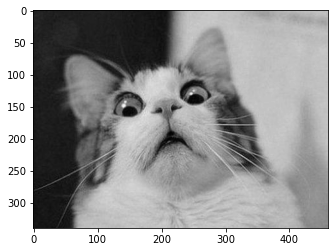

In [2]:
cat = plt.imread('cat.tiff')/255
plt.imshow(cat)
plt.gray()
cat.shape

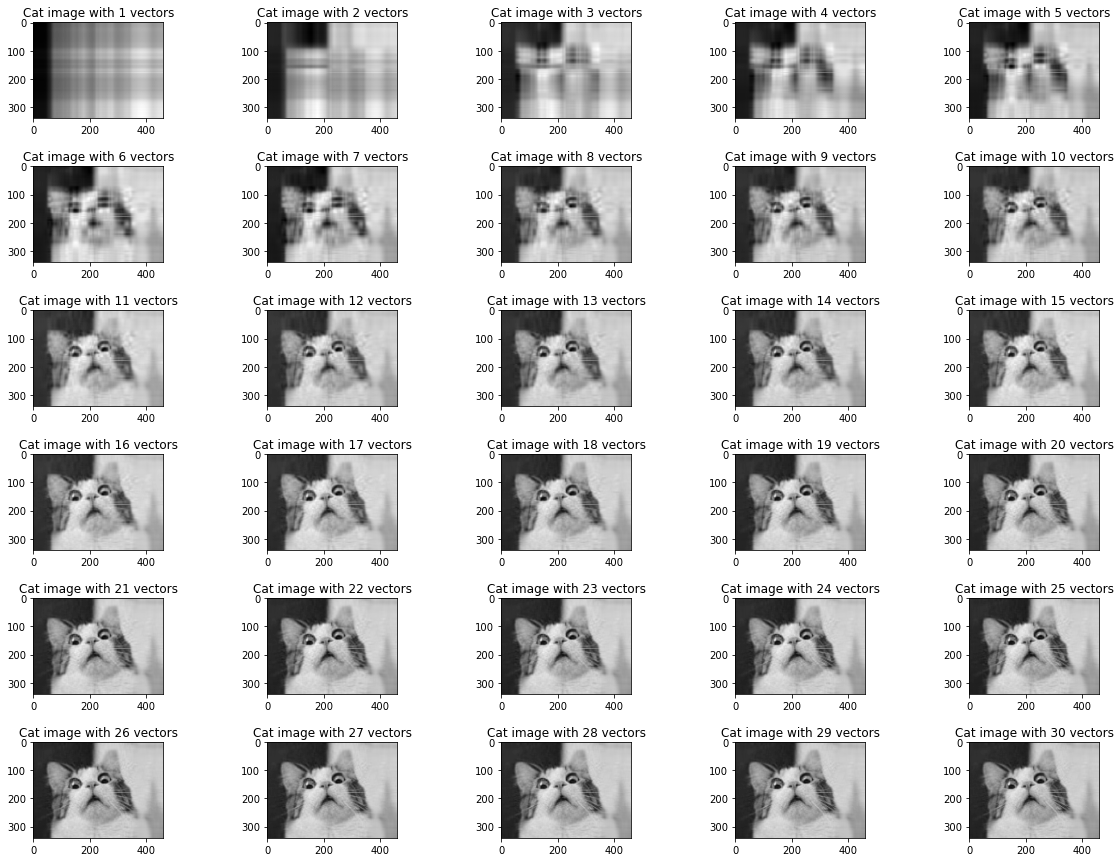

In [3]:
u,s,vh = np.linalg.svd(cat, full_matrices = True)

fig, axs = plt.subplots(6,5, figsize = (20, 15))
fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
axs = axs.flatten()
for k in range(30):
    reconst_matrix = np.dot(u[:,:k+1],np.dot(np.diag(s[:k+1]),vh[:k+1,:]))
    axs[k].set_title(f"Cat image with {k+1} vectors")
    axs[k].imshow(reconst_matrix)

In [4]:
print(u.shape)
print(s.shape)
print(vh.shape)

(340, 340)
(340,)
(460, 460)


### Explanation for original Space
For SVD, we split up the matrix into 3 different matrices (U, S, V). U is 340 x 340. S is 340. V is 460 x 460. Since we are now reducing to a certain amount of vectors (i) the dimensions of these values change to U (340xi), S (i), and V (ix460). We can then sum this up and place that over the total size of the original matrix (340*460).

In [5]:
# Calculate amount of original space
orig_x, orig_y = cat.shape

for i in range(1,31):
    total = ((340*i)+i+(460*i))/(orig_x*orig_y)
    per_total = total*100
    print(f"Percent of total Original Space for {i} vectors: {per_total:.3f}%")

Percent of total Original Space for 1 vectors: 0.512%
Percent of total Original Space for 2 vectors: 1.024%
Percent of total Original Space for 3 vectors: 1.536%
Percent of total Original Space for 4 vectors: 2.049%
Percent of total Original Space for 5 vectors: 2.561%
Percent of total Original Space for 6 vectors: 3.073%
Percent of total Original Space for 7 vectors: 3.585%
Percent of total Original Space for 8 vectors: 4.097%
Percent of total Original Space for 9 vectors: 4.609%
Percent of total Original Space for 10 vectors: 5.121%
Percent of total Original Space for 11 vectors: 5.634%
Percent of total Original Space for 12 vectors: 6.146%
Percent of total Original Space for 13 vectors: 6.658%
Percent of total Original Space for 14 vectors: 7.170%
Percent of total Original Space for 15 vectors: 7.682%
Percent of total Original Space for 16 vectors: 8.194%
Percent of total Original Space for 17 vectors: 8.707%
Percent of total Original Space for 18 vectors: 9.219%
Percent of total Or

### Comment on Results
By about 16 vectors, the cat image becomes clear. We could compress down to using 16 vectors and still get a clear cat image. 

### 4.2 PCA for Image Compression

We can also compress images using principle componenet anaysis (SVD and PCA are actually related closely).

Using either numpy or scikit, compute the PCA of the cat image. Following, plot reconstructions of the image with different values of n where n is the number of principle components. Similarly, calculate percent of total original space, each SVD takes of original image. Comment on results

(340, 460)

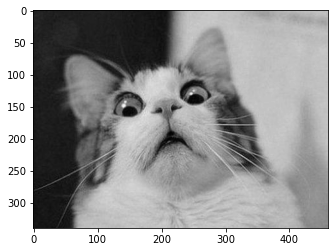

In [6]:
cat = plt.imread('cat.tiff')/255
plt.imshow(cat)
plt.gray()
cat.shape

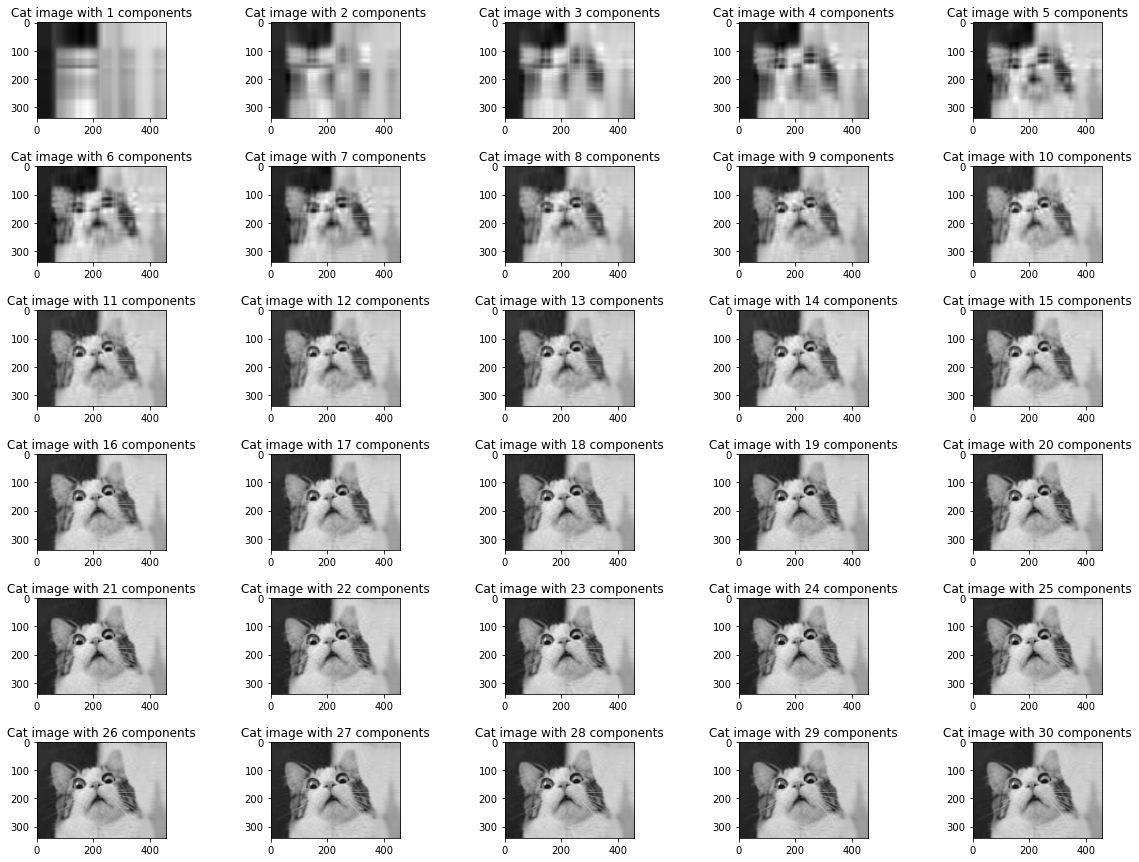

In [7]:
## can use PCA package the use the number of principal components
from sklearn.decomposition import PCA


fig, axs = plt.subplots(6,5, figsize = (20, 15))
fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
axs = axs.flatten()
for i in range(30):
    pca = PCA(n_components = i+1)
    cat_reduce = pca.fit_transform(cat)
    cat_recover = pca.inverse_transform(cat_reduce)
    image_cat = cat_recover.reshape(340,460)
    axs[i].set_title(f"Cat image with {i+1} components")
    axs[i].imshow(image_cat)



In [8]:
pca = PCA(n_components = 340)
cat_reduce = pca.fit_transform(cat)
cat_reduce.shape

(340, 340)

### Explanation for original space
Since we are doing PCA, we use SVD to break down the matrix. The same equation described above can be used here.

In [9]:
# Calculate amount of original space
orig_x, orig_y = cat.shape


for i in range(1,31):
    total = ((340*i)+i+(460*i))/(orig_x*orig_y)
    per_total = total*100
    print(f"Percent of total Original Space for {i} components: {per_total:.3f}%")

Percent of total Original Space for 1 components: 0.512%
Percent of total Original Space for 2 components: 1.024%
Percent of total Original Space for 3 components: 1.536%
Percent of total Original Space for 4 components: 2.049%
Percent of total Original Space for 5 components: 2.561%
Percent of total Original Space for 6 components: 3.073%
Percent of total Original Space for 7 components: 3.585%
Percent of total Original Space for 8 components: 4.097%
Percent of total Original Space for 9 components: 4.609%
Percent of total Original Space for 10 components: 5.121%
Percent of total Original Space for 11 components: 5.634%
Percent of total Original Space for 12 components: 6.146%
Percent of total Original Space for 13 components: 6.658%
Percent of total Original Space for 14 components: 7.170%
Percent of total Original Space for 15 components: 7.682%
Percent of total Original Space for 16 components: 8.194%
Percent of total Original Space for 17 components: 8.707%
Percent of total Origin

### Comment on Results
Similar to SVD, after about 16 components then the cat becomes clear. 

### 4.3 Deconvolution

Now, we are going to examine an existing method for restoring images.  Generally, these methods are known as deconvolution.  You should examine the different methods in `skimage` for deconvolving images.  Some methods are often better than others under certain circumstances.  Note that the functions in `skimage` refer to the __impulse response__ at the __point spread function (PSF)__.  These two terms are often used interchangeably.  

When using these methods for deconvolution, they generally require you to provide a guess at what the manipulation to the data was.  Otherwise, the methods will have a lot of difficulty converging to a good image.  Typically, as is often true with data-driven methods, we simply have to make guesses at which options and filters will produce the best results.  When we examine machine learning later in the course, we will see how much guess-and-checking is often required to solve these kinds of problems.

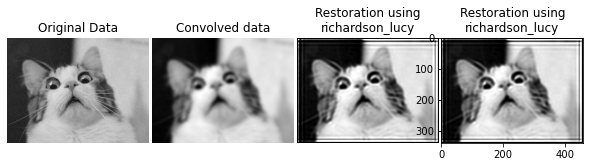

In [10]:

#Scipy's methods requires pixel values between 0 and 1
cat = plt.imread('cat.tiff')/255

# (OPTIONAL) Add Noise to Image
cat += (np.random.poisson(lam=25, size=cat.shape) - 10) / 255.

#adding the gaussian filer to the cat
cat_convolve = sim.gaussian_filter(cat, sigma = 4)

#We want to create a Point Spread Function which we input into the restoration function.
#We do this by creating an impulse response
point = np.zeros(cat.shape)
point[cat.shape[0]//2, cat.shape[1]//2] = 1 #Single point at the center
psf = sim.gaussian_filter(point, sigma = 4)

# Restore Image using Richardson-Lucy algorithm for a Gaussian Filter

#My test
deconvolved_wi = restoration.wiener(cat_convolve, psf, 1100)

deconvolved_RL = restoration.richardson_lucy(cat_convolve, psf, iterations=50)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(cat)
ax[0].set_title('Original Data')

ax[1].imshow(cat_convolve)
ax[1].set_title('Convolved data')

ax[2].imshow(deconvolved_RL, vmin=cat_convolve.min(), vmax=cat_convolve.max())
ax[2].set_title('Restoration using\nrichardson_lucy')

ax[3].imshow(deconvolved_RL, vmin=cat_convolve.min(), vmax=cat_convolve.max())
ax[3].set_title('Restoration using\nrichardson_lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

## Conceptual Questions

1. What is an impulse response? How does it create a point spread function in the example above?

2. Describe the Richardson-Lucy algorithm from a high-level

3. From the scikit restoration package, try one other deconvolution method. Comment on the results

### _Your Answer Here_
1. The impulse response is applying a convolutional filter to the original image which in our case is the Gaussian Filter. It creates a point spread function by applying the same impulse response (Gaussian Filter) to the matrix of zeros with one point in the middle.
2. The Richardson-Lucy Algorithm uses the Point Spread Function (PSF) to solve what is the mean value for each pixel by going one by one, using both the PSF and original blurred image. It determines the mean value for the pixel by doing a certain amount of iterations to guess at what the pixel is. 
3. I decided to use the wiener restoration method from scikit package. It actually looked like it blurred the image even further vs the convolved data.

### 4.4 DIY

Now, you should play more with the different deconvolution methods which exist in python's vast library of packages. The final problem of this homework will be to try and deconvolve an image without knowledge of the image's _point spread function_.  This is a quintessential inverse-problem.  We want to try and determine the original data and the manipulation done to the data while only knowing the final (often noisy) form of the data.  

We are providing you a new image (`Nicholas.npy`) which has been manipulated.  We have added _noise_ and we have _convolved_ the image.  Your job is to try and restore the image as best as possible.  

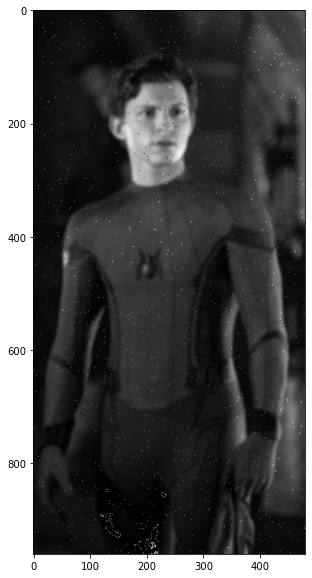

In [11]:
holland = np.load('holland.npy')/255
plt.figure(figsize = (10,10))
plt.imshow(holland)
plt.show()

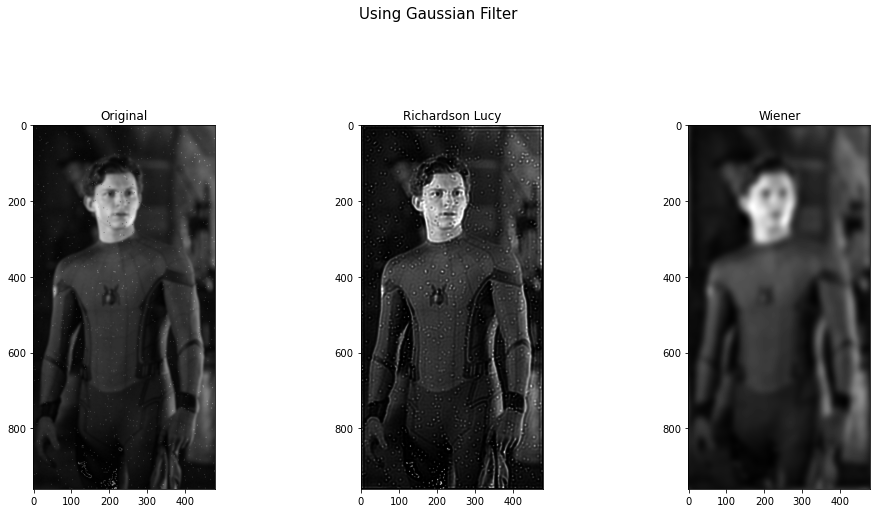

In [12]:
# First going to do the same convolution as above

# Do the PSF
point = np.zeros(holland.shape)
point[holland.shape[0]//2, holland.shape[1]//2] = 1 
psf = sim.gaussian_filter(point, sigma = 3)

# Restore Image using Richardson-Lucy algorithm for a Gaussian Filter
deconvolved_RL = restoration.richardson_lucy(holland, psf, iterations = 50)

# using wiener
deconvolved_wi = restoration.wiener(holland, psf, 1100)



fig, axs = plt.subplots(1,3, figsize = (15, 10))
fig.subplots_adjust(top = 1, hspace = 0.5, wspace = 0.8)
fig.suptitle("Using Gaussian Filter", fontsize = 15)
axs = axs.flatten()
axs[0].set_title("Original")
axs[0].imshow(holland)

axs[1].set_title("Richardson Lucy")
axs[1].imshow(deconvolved_RL)

axs[2].set_title("Wiener")
axs[2].imshow(deconvolved_wi)

plt.show()

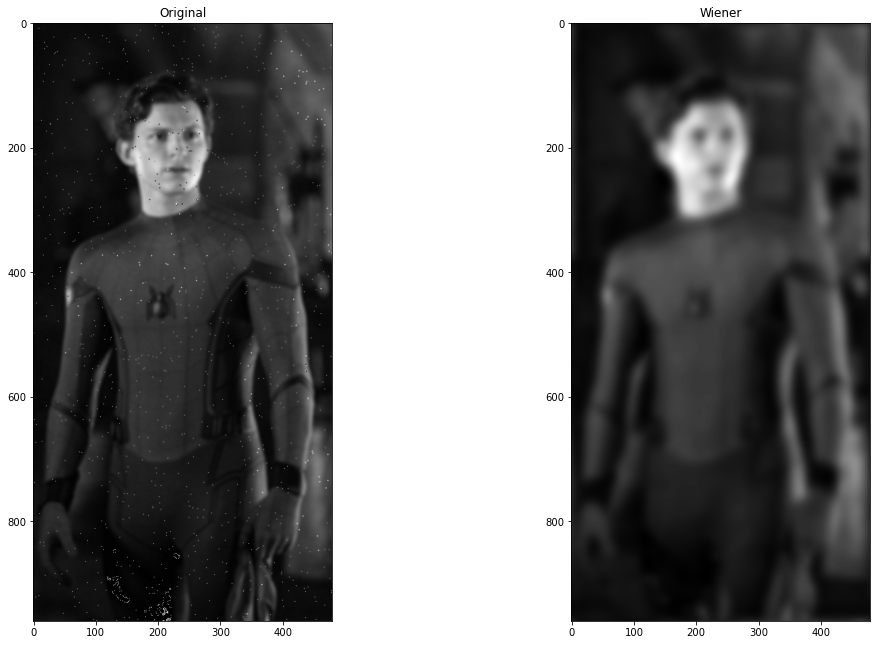

In [13]:
# Test with different filter

point = np.zeros(holland.shape)
point[holland.shape[0]//2, holland.shape[1]//2] = 1 
psf = sim.gaussian_filter1d(point, sigma = 1)

# using wiener
deconvolved_wi = restoration.wiener(holland, psf, 1100)


fig, axs = plt.subplots(1,2, figsize = (15, 10))
fig.subplots_adjust(top = 1, hspace = 0.5, wspace = 0.8)

axs = axs.flatten()
axs[0].set_title("Original")
axs[0].imshow(holland)

axs[1].set_title("Wiener")
axs[1].imshow(deconvolved_wi)


plt.show()